In [5]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("../data/train.csv")

In [6]:
train_data["Cabin"].apply(lambda s : s[0] if pd.notnull(s) else np.nan)

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [19]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# survived : whether the passenger survived or not

# Pclass : ticket class (1st, 2nd, 3st) -> to consider ordinal or cardinal and see if it has any impact on the survival rate
# Name : name of the passenger
# Sex : gender of the passenger
# Age : age of the passenger
# SibSp : number of siblings/spouses aboard the Titanic
# Parch : number of parents/children aboard the Titanic
# Ticket : ticket number
# Fare : passenger fare
# Cabin : Cabin number
# Embarked : Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_data["Cabin"].nunique()
# Too many cabin numbers, ticket numbers, and names to be useful for the model
# We can drop these columns

147

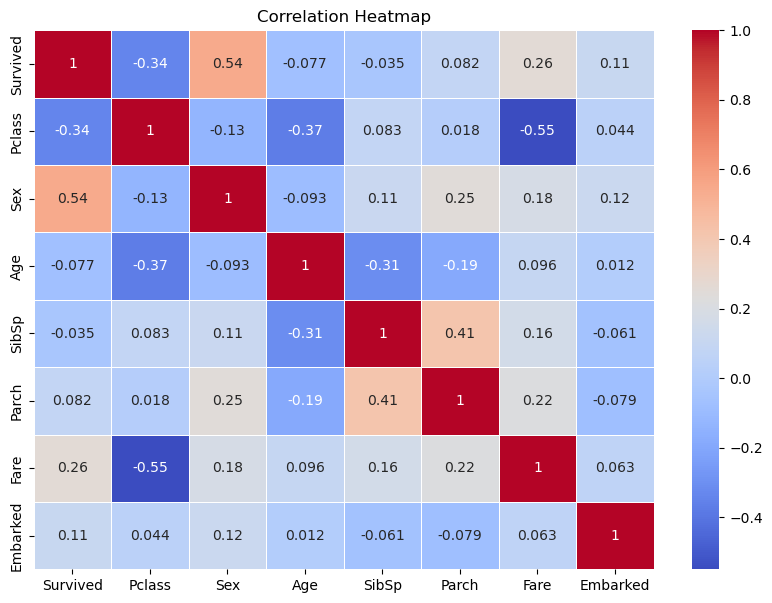

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

# Select numeric and relevant categorical columns
features_to_plot = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Convert categorical variables to numeric
plot_data = train_data[features_to_plot].copy()
plot_data['Sex'] = plot_data['Sex'].map({'male': 0, 'female': 1})
plot_data['Embarked'] = plot_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

plt.figure(figsize=(10, 7))
sns.heatmap(plot_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Drop irrelevant columns
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [25]:
# Split the dataset into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop("Survived", axis=1), train_data["Survived"], test_size=0.25, random_state=0)

In [26]:
# Check for missing values in columns age, fare and embarked
# Replace missing values with the median of numerical column and the most frequent value in the categorical column

X_train.isnull().sum()

Pclass        0
Sex           0
Age         133
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [27]:
num_cols = X_train.select_dtypes(include=[float, int]).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

for col in num_cols:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_valid[col].fillna(median_val, inplace=True)

for col in cat_cols:
    freq_val = X_train[col].mode()[0]
    X_train[col].fillna(freq_val, inplace=True)
    X_valid[col].fillna(freq_val, inplace=True)



/var/folders/b_/bjfw6fm51mn88dk24_v13wsc0000gn/T/ipykernel_79151/508559415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/var/folders/b_/bjfw6fm51mn88dk24_v13wsc0000gn/T/ipykernel_79151/508559415.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [28]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,3,male,28.0,0,0,7.8958,S
68,3,female,17.0,4,2,7.9250,S
253,3,male,30.0,1,0,16.1000,S
320,3,male,22.0,0,0,7.2500,S
706,2,female,45.0,0,0,13.5000,S
271,3,male,25.0,0,0,0.0000,S
424,3,male,18.0,1,1,20.2125,S
752,3,male,33.0,0,0,9.5000,S
615,2,female,24.0,1,2,65.0000,S
2,3,female,26.0,0,0,7.9250,S


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define the numerical and categorical columns
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']  # Including Pclass as categorical

# Create preprocessors
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and fit the preprocessing pipeline
preprocessor.fit(X_train)

# Transform the data
X_train_processed = preprocessor.transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(name, scores.mean())